# Yoga Pose Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import skimage
from skimage.io import imread,imshow
from skimage import transform
import os

In [44]:
labels=list()
path='dataset/train/'
os.listdir(path)
for i in os.listdir(path):
    labels.append(i)
    

In [9]:
labels


['downdog', 'goddess', 'plank', 'tree', 'warrior2']

In [10]:
## Counting the Samples
Total_sample=0
for i in os.listdir(path):
    print(f'Length of :{i}= {len(os.listdir(os.path.join(path,i)))}')
    Total_sample+=len(os.listdir(os.path.join(path,i)))
print(f'Total Samples:{Total_sample}')

Length of :downdog= 223
Length of :goddess= 180
Length of :plank= 266
Length of :tree= 160
Length of :warrior2= 252
Total Samples:1081


In [11]:
!pip install tqdm
from tqdm import tqdm

# Preprocessing Images 

1-Resizing

2-Scaling

In [12]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [14]:
path='dataset/train/'
img_size=170     # 170x170
X=[] 
Y=[]
i=0
for idx,img in enumerate(os.listdir(path)):
    for img_name in tqdm(os.listdir(path+img)):
        if i<300:
            img_file=imread(path+img+'/'+img_name)
            if img_file is not None:
                img_file=transform.resize(img_file,(img_size,img_size,3))
                X.append(img_file)
                Y.append(idx)
        else:
            break
        i=i+1
    i=0
X=np.asarray(X)
Y=np.asarray(Y)

100%|████████████████████████████████████████████████████████████████████████████████| 252/252 [01:19<00:00,  3.18it/s]


In [15]:
X

array([[[[9.53834635e-01, 9.38148361e-01, 9.42069929e-01],
         [9.56711916e-01, 9.41025642e-01, 9.44947210e-01],
         [9.57018256e-01, 9.41331982e-01, 9.45253550e-01],
         ...,
         [9.79518478e-01, 9.71675341e-01, 9.75596910e-01],
         [9.76651961e-01, 9.68808824e-01, 9.72730393e-01],
         [9.77867121e-01, 9.70023984e-01, 9.73945553e-01]],

        [[9.53839145e-01, 9.38152871e-01, 9.42074439e-01],
         [9.56707147e-01, 9.41020873e-01, 9.44942441e-01],
         [9.57018243e-01, 9.41331968e-01, 9.45253537e-01],
         ...,
         [9.79518478e-01, 9.71675341e-01, 9.75596910e-01],
         [9.76615759e-01, 9.68772622e-01, 9.72694190e-01],
         [9.76019165e-01, 9.68176027e-01, 9.72097596e-01]],

        [[9.54241127e-01, 9.38554853e-01, 9.42476421e-01],
         [9.56282070e-01, 9.40595796e-01, 9.44517364e-01],
         [9.57015431e-01, 9.41329156e-01, 9.45250725e-01],
         ...,
         [9.79518403e-01, 9.71675266e-01, 9.75596834e-01],
         [

In [16]:
X[0] ## Skimage scale image in range of 0 to 1

array([[[0.95383464, 0.93814836, 0.94206993],
        [0.95671192, 0.94102564, 0.94494721],
        [0.95701826, 0.94133198, 0.94525355],
        ...,
        [0.97951848, 0.97167534, 0.97559691],
        [0.97665196, 0.96880882, 0.97273039],
        [0.97786712, 0.97002398, 0.97394555]],

       [[0.95383915, 0.93815287, 0.94207444],
        [0.95670715, 0.94102087, 0.94494244],
        [0.95701824, 0.94133197, 0.94525354],
        ...,
        [0.97951848, 0.97167534, 0.97559691],
        [0.97661576, 0.96877262, 0.97269419],
        [0.97601916, 0.96817603, 0.9720976 ]],

       [[0.95424113, 0.93855485, 0.94247642],
        [0.95628207, 0.9405958 , 0.94451736],
        [0.95701543, 0.94132916, 0.94525072],
        ...,
        [0.9795184 , 0.97167527, 0.97559683],
        [0.97659623, 0.96875309, 0.97267466],
        [0.97502241, 0.96717928, 0.97110084]],

       ...,

       [[0.94401044, 0.90479559, 0.90871716],
        [0.94466473, 0.90544989, 0.90937146],
        [0.94556036, 0

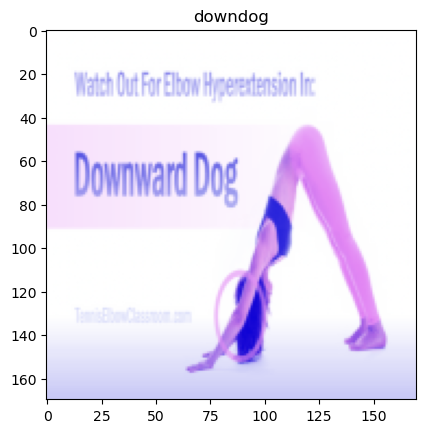

In [17]:
plt.imshow(X[124])
plt.title(labels[Y[124]])
plt.show()

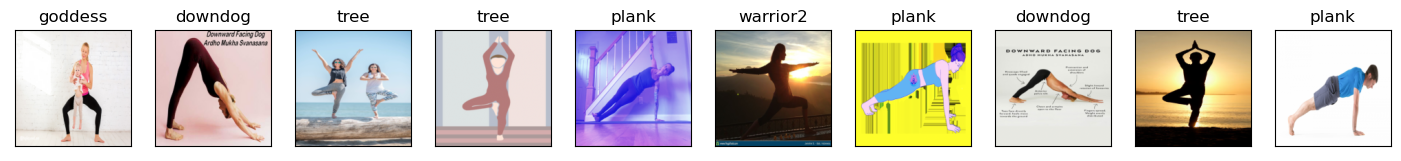

In [18]:
from random import randint
n = 50  # how many digits we will display
plt.figure(figsize=(90,40))
for i in range(10,20):
    # display original
    rn=randint(0,987)
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X[rn])
    plt.title(labels[Y[rn]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

# The CNN Model


# ///////////////////////

# Data Augumentation using ImageDataGenerator

In [45]:
IMG_H = 200
IMG_W = 200
IMG_C = 3

BATCH_SIZE = 32
EPOCHS = 30

In [47]:
train_gen = ImageDataGenerator(rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               width_shift_range=0.12,
                               height_shift_range=0.12,
                               horizontal_flip=True)

test_gen = ImageDataGenerator(rescale=1./255)

# Creating train, test set

In [68]:
BASE_PATH='dataset/'
train_set = train_gen.flow_from_directory(f'{BASE_PATH}TRAIN',
                                          target_size=(IMG_W,IMG_H),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical')

test_set = test_gen.flow_from_directory(f'{BASE_PATH}TEST',
                                          target_size=(IMG_W,IMG_H),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical')

Found 1081 images belonging to 5 classes.
Found 470 images belonging to 5 classes.


# Create Model

In [55]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential, Model
def create_model():
    tf.keras.backend.clear_session()
    
    cmodel = VGG19(input_shape = (IMG_W, IMG_H, IMG_C), 
                         weights='imagenet', 
                         include_top=False,)
    
    # there is no need to train existing weights
    for layer in cmodel.layers:
        layer.trainable = False
        
    x = Flatten()(cmodel.output)
    #x = cmodel.output
 
    prediction = Dense(len(labels), activation='softmax')(x)

    # create model object
    model = Model(inputs = cmodel.input, outputs = prediction)
    
    return model

In [56]:
model = create_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [69]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

In [70]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callbacks_list = [es, lr_reduction]

history = model.fit(train_set,
                    validation_data=test_set,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    callbacks=callbacks_list,
                    shuffle=True
                    )

Epoch 1/30
34/34 [==============================] - 451s 11s/step - loss: 1.1676 - accuracy: 0.5680 - val_loss: 0.2822 - val_accuracy: 0.9149 - lr: 0.0010
Epoch 2/30
34/34 [==============================] - 347s 10s/step - loss: 0.5698 - accuracy: 0.8076 - val_loss: 0.2422 - val_accuracy: 0.9128 - lr: 0.0010
Epoch 3/30
34/34 [==============================] - 351s 10s/step - loss: 0.4294 - accuracy: 0.8622 - val_loss: 0.1284 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 4/30
34/34 [==============================] - 347s 10s/step - loss: 0.3335 - accuracy: 0.9103 - val_loss: 0.1121 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 5/30
34/34 [==============================] - 354s 11s/step - loss: 0.3206 - accuracy: 0.9121 - val_loss: 0.1401 - val_accuracy: 0.9468 - lr: 0.0010
Epoch 6/30
34/34 [==============================] - 436s 13s/step - loss: 0.3124 - accuracy: 0.9019 - val_loss: 0.1316 - val_accuracy: 0.9511 - lr: 0.0010
Epoch 7/30
34/34 [==============================] - 442s 13s/step - lo

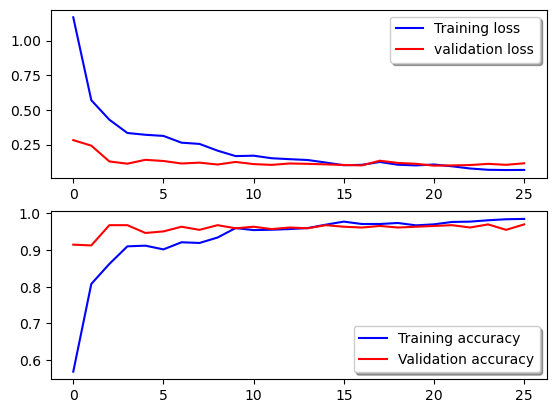

In [71]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [72]:
model.evaluate(train_set), model.evaluate(test_set)

15/15 [==============================] - 115s 8s/step - loss: 0.1150 - accuracy: 0.9702


([0.0645526647567749, 0.9861239790916443],
 [0.11497572064399719, 0.9702127575874329])

# Confusion matrix and Classification Report

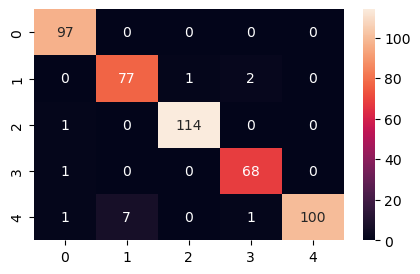




              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       0.92      0.96      0.94        80
           2       0.99      0.99      0.99       115
           3       0.96      0.99      0.97        69
           4       1.00      0.92      0.96       109

    accuracy                           0.97       470
   macro avg       0.97      0.97      0.97       470
weighted avg       0.97      0.97      0.97       470



In [83]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_val_org, ypreds)

plt.figure(figsize=(5,3))
ax = sns.heatmap(cf_matrix, annot=True, fmt='g')
plt.show()

print("\n\n")
print(classification_report(y_val_org, ypreds))


# Extract label from test_set

In [74]:
y_val_org = []
for i in range( test_set.__len__() ):
    y_val_org.extend(
        test_set.__getitem__( i )[1] 
    )
y_val_org = np.array(y_val_org)
y_val_org = np.argmax(y_val_org, axis=1)

In [75]:
y_val_org


array([1, 4, 2, 2, 2, 3, 2, 0, 1, 4, 0, 1, 2, 4, 2, 4, 4, 2, 2, 4, 3, 4,
       4, 1, 0, 0, 1, 4, 2, 4, 4, 4, 2, 0, 4, 4, 4, 4, 1, 4, 1, 4, 2, 4,
       3, 4, 1, 3, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 3, 4, 3, 4, 3, 2,
       2, 1, 4, 3, 3, 1, 2, 0, 0, 4, 4, 4, 2, 1, 1, 2, 0, 1, 3, 4, 2, 3,
       3, 3, 0, 3, 1, 3, 2, 0, 2, 0, 2, 3, 3, 4, 0, 4, 2, 1, 2, 4, 4, 0,
       0, 4, 0, 1, 3, 0, 0, 0, 4, 1, 0, 1, 4, 0, 1, 2, 1, 2, 3, 2, 4, 4,
       2, 4, 2, 0, 1, 4, 2, 4, 1, 2, 1, 1, 0, 2, 4, 4, 2, 2, 2, 2, 0, 4,
       0, 2, 4, 2, 4, 3, 3, 2, 4, 1, 4, 3, 3, 0, 2, 4, 4, 0, 2, 4, 3, 4,
       2, 1, 4, 0, 2, 0, 4, 4, 0, 1, 2, 1, 0, 0, 0, 3, 4, 2, 0, 2, 1, 1,
       0, 1, 1, 3, 3, 2, 4, 3, 4, 0, 3, 0, 2, 1, 0, 2, 2, 0, 1, 4, 3, 3,
       1, 2, 1, 0, 2, 1, 4, 4, 2, 0, 1, 4, 1, 0, 1, 0, 2, 4, 2, 2, 2, 0,
       1, 2, 1, 1, 4, 1, 0, 2, 0, 4, 0, 1, 2, 1, 0, 2, 2, 3, 2, 0, 0, 4,
       4, 2, 1, 3, 2, 2, 3, 1, 2, 3, 0, 1, 4, 0, 1, 3, 3, 2, 4, 2, 3, 3,
       2, 0, 3, 3, 0, 3, 0, 2, 0, 4, 4, 4, 0, 1, 0,

# Predict Test data

In [76]:
ypreds = model.predict(test_set)
ypreds = np.argmax(ypreds, axis=1)
ypreds

15/15 [==============================] - 124s 8s/step


array([1, 4, 2, 2, 2, 3, 2, 0, 1, 4, 0, 1, 0, 4, 2, 4, 4, 2, 2, 4, 3, 1,
       4, 1, 0, 0, 1, 4, 2, 4, 4, 4, 2, 0, 4, 4, 4, 4, 1, 4, 1, 4, 2, 4,
       3, 1, 1, 3, 2, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 0, 3, 4, 3, 4, 3, 2,
       2, 1, 4, 3, 3, 1, 2, 0, 0, 4, 4, 4, 2, 1, 1, 2, 0, 1, 3, 4, 2, 3,
       3, 3, 0, 3, 1, 3, 2, 0, 2, 0, 2, 3, 3, 4, 0, 4, 2, 1, 2, 1, 4, 0,
       0, 4, 0, 1, 3, 0, 0, 0, 4, 1, 0, 1, 4, 0, 1, 2, 1, 2, 3, 2, 4, 4,
       2, 4, 2, 0, 1, 4, 2, 4, 3, 2, 1, 1, 0, 2, 4, 4, 2, 2, 2, 2, 0, 4,
       0, 2, 4, 2, 4, 3, 3, 2, 4, 1, 4, 3, 3, 0, 2, 4, 4, 0, 2, 4, 3, 4,
       2, 1, 4, 0, 2, 0, 4, 4, 0, 1, 2, 1, 0, 0, 0, 3, 4, 2, 0, 2, 1, 1,
       0, 1, 1, 3, 3, 2, 1, 3, 4, 0, 3, 0, 2, 1, 0, 2, 2, 0, 1, 4, 3, 3,
       1, 2, 1, 0, 2, 1, 4, 4, 2, 0, 1, 4, 1, 0, 1, 0, 2, 4, 2, 2, 2, 0,
       1, 2, 1, 3, 4, 2, 0, 2, 0, 4, 0, 1, 2, 1, 0, 2, 2, 3, 2, 0, 0, 4,
       4, 2, 1, 3, 2, 2, 3, 1, 2, 3, 0, 1, 4, 0, 1, 3, 3, 2, 4, 2, 3, 3,
       2, 0, 3, 3, 0, 3, 0, 2, 0, 4, 3, 4, 0, 1, 0,

15/15 [==============================] - 115s 8s/step


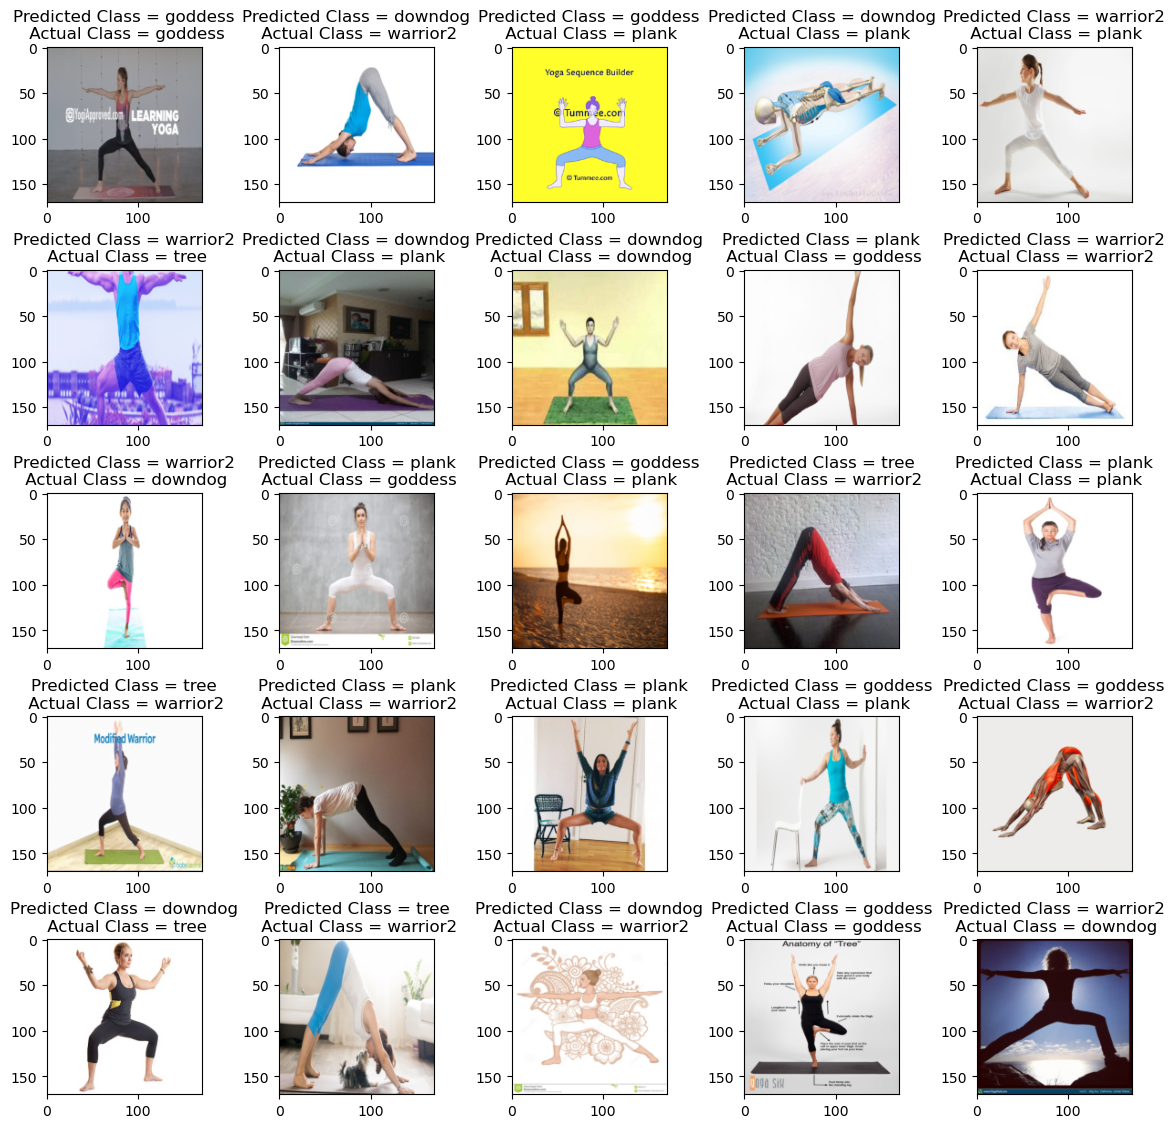

In [84]:
predicted_classes=model.predict(test_set)
predicted_classes=np.argmax(predicted_classes,1)
Y_classes=y_val_org
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize = (14,14))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title(f"Predicted Class = {labels[predicted_classes[i]]}\n Actual Class = {labels[Y_classes[i]]}")
    axes[i].axis('on')
plt.subplots_adjust(wspace=0.5)